# How does genre affect ratings across seasons ?

In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import json, math
import seaborn as sns
import itertools, yaml
from collections import Counter
import networkx as nx


In [386]:
genredf=pd.read_csv("genre.csv")

In [387]:
genredf.shape

(5569, 31)

In [388]:
countrydf=pd.read_csv("country.csv")

In [389]:
ratingsdf=pd.read_csv("ratings.csv")

In [390]:
alldatadf=pd.read_csv("all_data.csv")

In [391]:
#to differentiate country N/A from genres N/A
countrydf.rename(columns={'nan':'C N/A'}, inplace=True)
genredf.rename(columns={'nan':'G N/A'}, inplace=True)


In [392]:
#a list of the country names
countrylist=list(countrydf.columns[3:])

In [393]:
countrylist

['USA',
 'Canada',
 'UK',
 'Australia',
 'Mexico',
 'Yugoslavia',
 'Denmark',
 'Netherlands',
 'Italy',
 'Sweden',
 'France',
 'Germany',
 'Belgium',
 'Japan',
 'Austria',
 'Switzerland',
 'Hungary',
 'Norway',
 'Taiwan',
 'Philippines',
 'South Korea',
 'New Zealand',
 'Spain',
 'China',
 'Cuba',
 'Poland',
 'Bulgaria',
 'Portugal',
 'Finland',
 'Brazil',
 'Russia',
 'Czechoslovakia',
 'C N/A',
 'Hong Kong',
 'Serbia',
 'Vietnam',
 'Greece',
 'Argentina',
 'Iceland',
 'Serbia and Montenegro',
 'Turkey',
 'Ireland',
 'Croatia',
 'India',
 'South Africa',
 'Luxembourg',
 'Singapore',
 'Estonia',
 'Israel',
 'Romania',
 'Bosnia and Herzegovina',
 'Malaysia',
 'Czech Republic',
 'Colombia',
 'Montenegro',
 'Chile',
 'Thailand',
 'Pakistan',
 'Georgia',
 'Cyprus',
 'United Arab Emirates',
 'Bangladesh',
 'Iran',
 'Ukraine',
 'Kuwait']

In [394]:
#list of genre names
genrelist=list(genredf.columns[3:])

In [395]:
alldatadf.columns

Index(['id', 'title', 'total_seasons', 'imdb_votes', 'runtime', 'genre',
       'country', 'writer', 'startYear', 'endYear', 'seasonRating'],
      dtype='object')

In [396]:
totaldf=pd.concat([alldatadf[['id', 'title', 'total_seasons', 'startYear', 'endYear', 'runtime', 'imdb_votes']] ,  ratingsdf.iloc[:, 2:] ], axis=1)

In [397]:
totaldf=pd.merge(totaldf,countrydf, on=['id', 'title'])

In [398]:
totaldf=pd.merge(totaldf,genredf, on=['id', 'title'])


In [399]:
#calculating the frequency of each genre
genredict = {}
for i in genrelist:
    count=0
    for j, value in totaldf.iterrows():
        if(totaldf[i][j] == "true"):
            count=count+1
    genredict[i] = count        
  

In [400]:
mydict=dict(sorted(genredict.items(), key=lambda x: x[1]))
names=list(mydict.keys())
values=list(mydict.values())

C:\Users\oyino\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


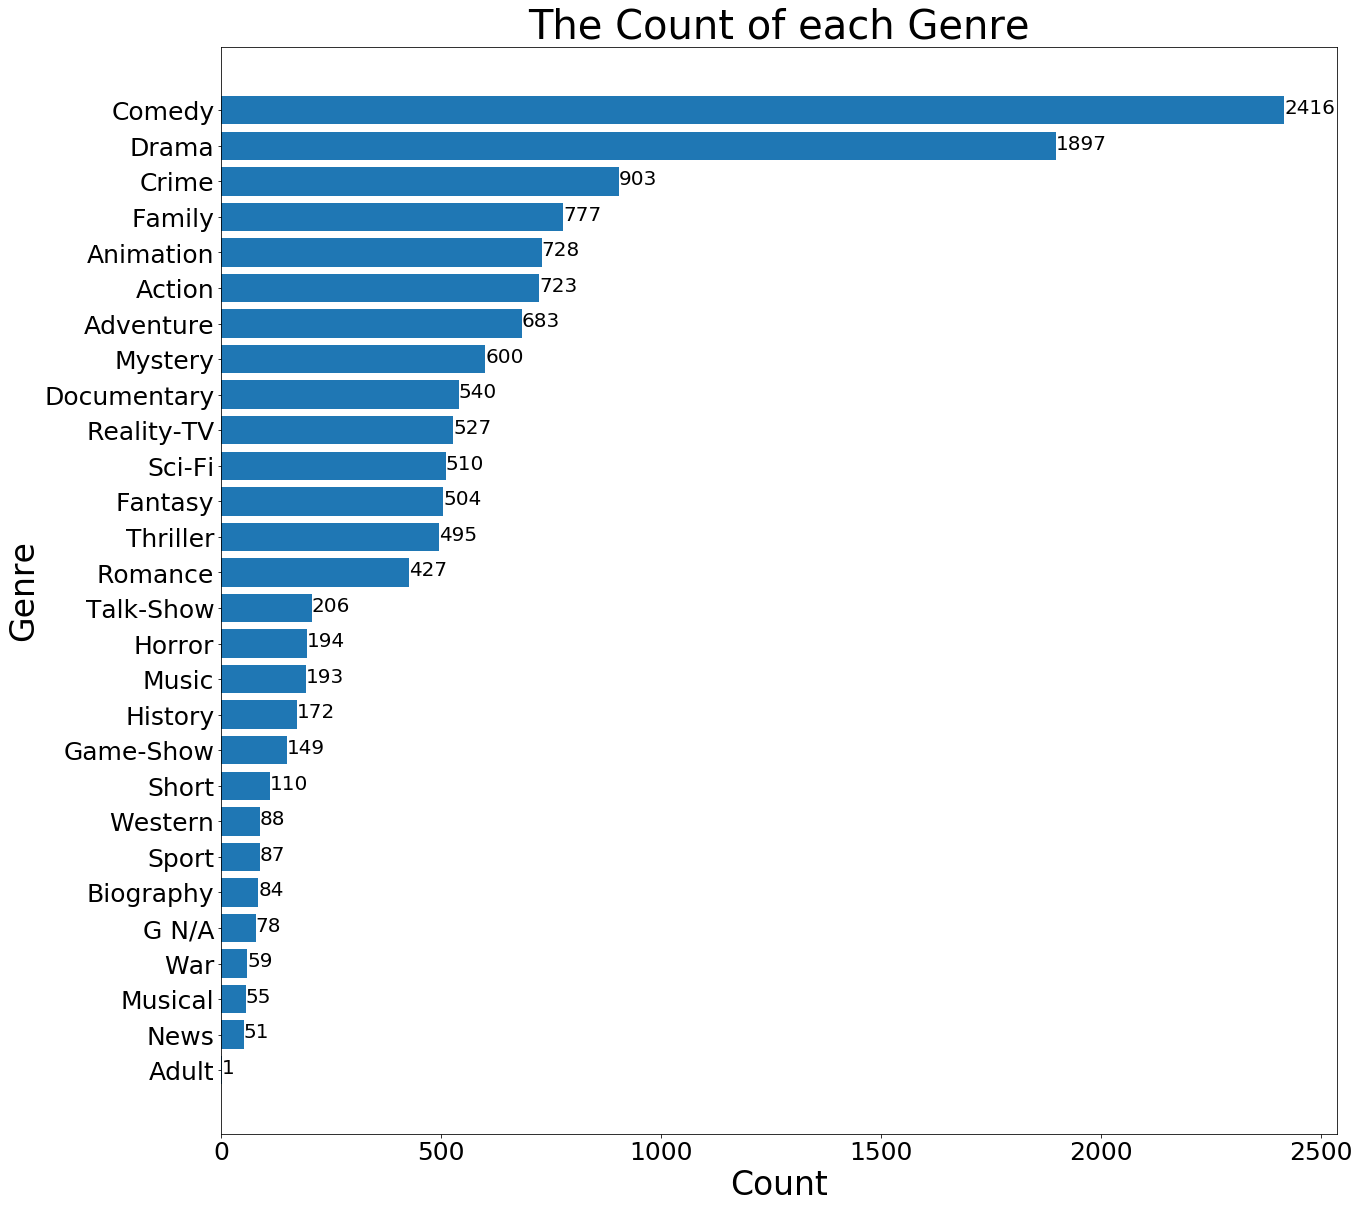

In [401]:
fig, ax = plt.subplots(figsize=(20,20))
y_pos = np.arange(len(names))
ax.barh(y_pos,values, align='center')
ax.set_yticks(y_pos)
ax.tick_params(labelsize=25)
ax.set_yticklabels(names, fontsize=25)
ax.set_ylabel('Genre', fontsize=33)
ax.set_xlabel('Count', fontsize=33)
ax.set_title('The Count of each Genre', fontsize=40)

#show text of the count of each genre
for i in ax.patches:
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=20)

fig.show()



## Create dataframe for each genre
There are 28 different genre categories in total but we'll just calculate the dataframe for the top 15 most frequent genres 

In [402]:
def getGenredf(genre):
    #df_name = "genre" + "df"
    df_name = totaldf[totaldf[genre] == "true"].copy()#[['id','total_seasons', 'Season 1', 'Season 2', 'Season 3', 'Season 4', 'Season 5', 'Season 6', 'Season 7', 'Season 8', 'Season 9', 'Season 10']].copy()
    df_name.head()
    #print(df_name['Season 1'].iloc[0])
    return df_name.reset_index(drop=True)

In [403]:
comedydf=getGenredf("Comedy")#.reset_index(drop=True)
dramadf=getGenredf("Drama")
familydf=getGenredf("Family")
realitydf=getGenredf("Reality-TV")
crimedf=getGenredf("Crime")
animationdf=getGenredf("Animation")
docudf=getGenredf("Documentary")
advdf=getGenredf("Adventure")
actiondf=getGenredf("Action")
scifidf=getGenredf("Sci-Fi")
romancedf=getGenredf("Romance")
thrilldf=getGenredf("Thriller")
mysterydf=getGenredf("Mystery")
fantasydf=getGenredf("Fantasy")
talkdf = getGenredf("Talk-Show")

In [404]:
#get the mean rating for each season of a genre
def getdfmeans(df, num):
    dfmeans = []
    
    df=df[df['total_seasons'] ==num]
    
    #print(df)
    if(num==10):
        dfmeans=(round(df['Season 1'].mean(),1), round(df['Season 2'].mean(),1), round(df['Season 3'].mean(),1), round(df['Season 4'].mean(),1), round(df['Season 5'].mean(),1), round(df['Season 6'].mean(),1), round(df['Season 7'].mean(),1), round(df['Season 8'].mean(),1), round(df['Season 9'].mean(),1), round(df['Season 10'].mean(),1) )
    if(num == 5):
        dfmeans=(round(df['Season 1'].mean(),1), round(df['Season 2'].mean(),1), round(df['Season 3'].mean(),1), round(df['Season 4'].mean(),1), round(df['Season 5'].mean(),1))
    if (num==2):
        dfmeans=(round(df['Season 1'].mean(),1), round(df['Season 2'].mean(),1))
    
    return dfmeans

In [405]:
num=10
ten_seasons = {}

ten_seasons['Comedy']=list(getdfmeans(comedydf, num))
ten_seasons['Drama']=list(getdfmeans(dramadf, num))  
ten_seasons['Crime']=list(getdfmeans(crimedf, num))
ten_seasons['Family']=list(getdfmeans(familydf, num))                           
ten_seasons['Animation']=list(getdfmeans(animationdf, num))
ten_seasons['Action']=list(getdfmeans(actiondf, num))
ten_seasons['Adventure']=list(getdfmeans(advdf, num))
ten_seasons['Mystery']=list(getdfmeans(mysterydf, num))
ten_seasons['Documentary']=list(getdfmeans(docudf, num))
ten_seasons['Reality']=list(getdfmeans(realitydf, num))


## How does the rating of a genre change throughout the seasons ?

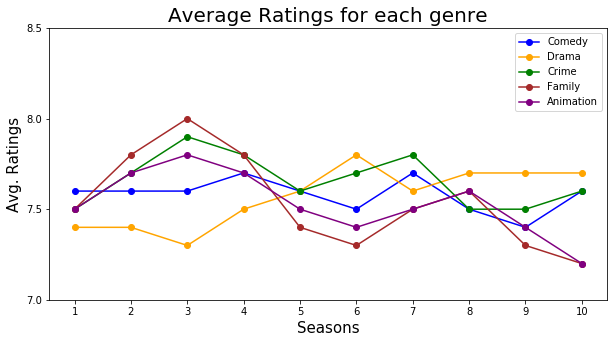

In [406]:

fig, ax = plt.subplots(figsize=(10,5))

num=range(1,11,1)
ax.plot(num, ten_seasons['Comedy'],'ko-',label="Comedy", color='blue')
ax.plot(num, ten_seasons['Drama'],'ko-', label='Drama', color='orange')
ax.plot(num, ten_seasons['Crime'], 'ko-',label='Crime', color='green')
ax.plot(num, ten_seasons['Family'], 'ko-',label='Family', color='brown')
ax.plot(num, ten_seasons['Animation'], 'ko-',label='Animation', color='purple')

legend = ax.legend(loc="upper right")
plt.xlabel('Seasons', fontsize=15)
plt.ylabel('Avg. Ratings', fontsize=15)
plt.title('Average Ratings for each genre', fontsize=20)
plt.xticks(num)
plt.yticks(np.arange(7.0,9,0.5))
plt.show()
#plt.savefig("lineplot")

Results:
    - Comedy shows decreased slightly from season constant throughout the seasons
    - Drama series showed the greatest increase in ratings across the seasons
    - Crime series fluctuate a lot but stays with ratings equal or greater than it's first season
    - Animation and family shows got worse throughout the seasons. 
    

## What season length is best for each genre ?

Looking at shows that ran for a short time, medium length of time and a long time to determine which season length is best for the different genres.

In [407]:
def createHeatMap(genredf, genres, seasons, title):
   
    #turn dataframe to numpy array
    arr=genredf.to_numpy()
    fig,ax = plt.subplots(figsize=(10,10))
    im=ax.imshow(arr)

   
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel("Avg ratings", rotation=-90, va="bottom")
   
    ax.set_title(title, fontsize=20)
    ax.set_ylabel("Genres", fontsize=15)
    ax.set_xlabel("Seasons", fontsize=15)
    
    #set no of x and y ticks
    ax.set_xticks(np.arange(len(seasons)))
    ax.set_yticks(np.arange(len(genres)))

    #creat c ticks from 1 to 10
    ax.set_xticklabels(range(1,len(seasons)+1,1))
    ax.set_yticklabels(genres)

    #annotate graph with the rating for each season
    for i in range(len(genres)):
        for j in range(len(seasons)):
            text = ax.text(j, i, arr[i, j],
                       ha="center", va="center", color="black")
            
    plt.savefig("heatmap3")

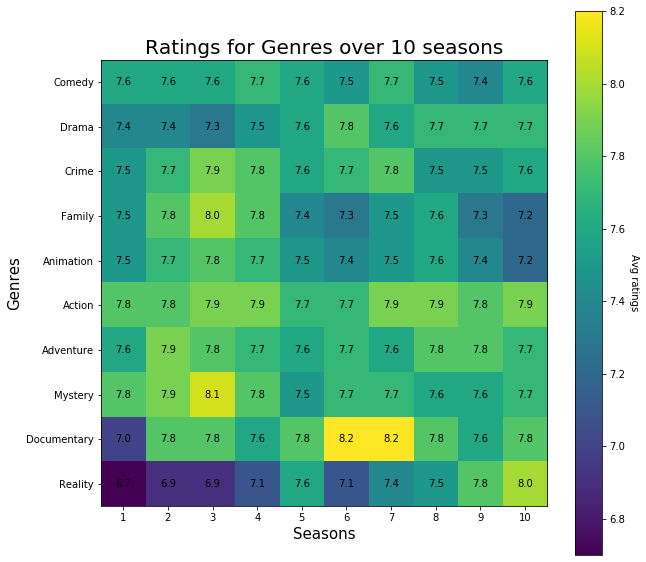

In [408]:
genres= list(ten_seasons.keys())
seasons=['Season 1', 'Season 2', 'Season 3', 'Season 4', 'Season 5', 'Season 6', 'Season 7', 'Season 8', 'Season 9', 'Season 10']
genredf=pd.DataFrame.from_dict(ten_seasons, orient='index')
title = "Ratings for Genres over 10 seasons"
createHeatMap(genredf, genres, seasons,title)

In [409]:
num=5
five_seasons = {}

five_seasons['Comedy']=list(getdfmeans(comedydf, num))
five_seasons['Drama']=list(getdfmeans(dramadf, num))  
five_seasons['Crime']=list(getdfmeans(crimedf, num))
five_seasons['Family']=list(getdfmeans(familydf, num))                           
five_seasons['Animation']=list(getdfmeans(animationdf, num))
five_seasons['Action']=list(getdfmeans(actiondf, num))
five_seasons['Adventure']=list(getdfmeans(advdf, num))
five_seasons['Mystery']=list(getdfmeans(mysterydf, num))
five_seasons['Documentary']=list(getdfmeans(docudf, num))
five_seasons['Reality']=list(getdfmeans(realitydf, num))


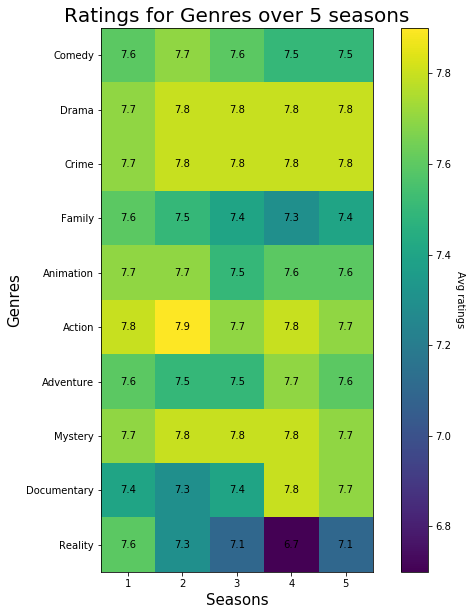

In [410]:
genres= list(five_seasons.keys())
seasons=['Season 1', 'Season 2', 'Season 3', 'Season 4', 'Season 5']
genredf=pd.DataFrame.from_dict(five_seasons, orient='index')
title = "Ratings for Genres over 5 seasons"
createHeatMap(genredf, genres, seasons,title)

In [411]:
two_seasons={}
num=2

two_seasons['Comedy']=list(getdfmeans(comedydf, num))
two_seasons['Drama']=list(getdfmeans(dramadf, num))  
two_seasons['Crime']=list(getdfmeans(crimedf, num))
two_seasons['Family']=list(getdfmeans(familydf, num))                           
two_seasons['Animation']=list(getdfmeans(animationdf, num))
two_seasons['Action']=list(getdfmeans(actiondf, num))
two_seasons['Adventure']=list(getdfmeans(advdf, num))
two_seasons['Mystery']=list(getdfmeans(mysterydf, num))
two_seasons['Documentary']=list(getdfmeans(docudf, num))
two_seasons['Reality']=list(getdfmeans(realitydf, num))


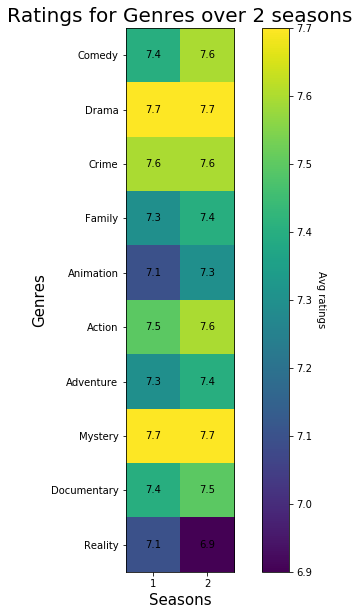

In [412]:
seasons=['Season 1', 'Season 2']
genres= list(two_seasons.keys())
genredf=pd.DataFrame.from_dict(two_seasons, orient='index')
title = "Ratings for Genres over 2 seasons"
createHeatMap(genredf, genres, seasons,title)

## Does a genre experience higher ratings alone or paired with other genres ?


In [413]:
##remove the list from within the string
totaldf['Genre']=tuple(yaml.safe_load(i) for i in totaldf['Genre'])

In [414]:
ten_seasons=totaldf[totaldf['total_seasons']>=10]

In [415]:
# Count the genre pairs in dataframe
pair_counts = Counter()
for i, val in ten_seasons['Genre'].iteritems():
    if(len(val)>2):
        
        genre_pairs = list(itertools.combinations(val, r=2) )
        for genre1, genre2 in genre_pairs:
            # convert to a set, because the order doesn't matter
            pair = frozenset([genre1.strip(), genre2.strip()])
            pair_counts[pair] += 1        

In [416]:
#creating the newtork
g = nx.Graph()
for pair in pair_counts:
    g.add_edge(*pair, weight=pair_counts[pair])
g.number_of_nodes(), g.number_of_edges()

(25, 167)

In [417]:
g2 = nx.Graph()
for node1, node2, attrs in g.edges(data=True):
    # only get genre pairs that showed up more than 20 times
    if attrs["weight"] >= 20:
        g2.add_edge( node1, node2, **attrs)
g2.number_of_nodes(), g2.number_of_edges()

(8, 10)

C:\Users\oyino\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


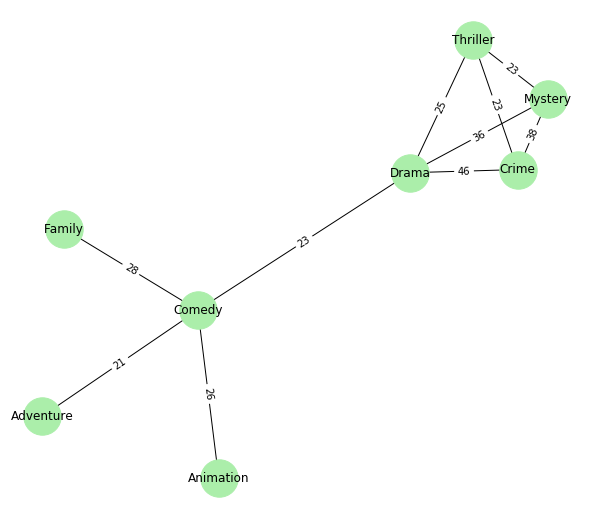

In [418]:
plt.figure( figsize=(8,7) ) 
# apply layout algorithm to calculate node positions
pos = nx.spring_layout( g2 )
# draw the nodes and edges
nx.draw(g2, pos, with_labels = True, node_size=1400, font_size=12, node_color="#abeeaa")
# now add the edge weights as labels
labels = nx.get_edge_attributes(g2, 'weight')
nx.draw_networkx_edge_labels(g2, pos,edge_labels=labels);

In [419]:
# returns a dataframe of shows with only the specified genre
def getonegenre(genre):
    
    l=genrelist.copy()
    l.remove(genre)
    
    #creates dataframe where a cell is False if a column has a "true" value
    mask=totaldf[l]==" "
    valid = [True]*27 
    
    a=[]
    for i, val in mask.iterrows():
        if (valid==(val).values.tolist()):
            #appends row index where all columns but the specfied genre is " "
            a.append(i)
            
    return totaldf.loc[a]

In [420]:
def createBoxPlot(genre1, genre2, colors):
    #create a datfarme with shows of the genre combination
    tmpdf=ten_seasons[ten_seasons[genre1]=="true"].copy()
    tmpdf=tmpdf[tmpdf[genre2]=="true"]
  
    boxplot = tmpdf.boxplot(column = ['Season 1', 'Season 2', 'Season 3', 'Season 4', 'Season 5', 'Season 6', 'Season 7', 'Season 8','Season 9', 'Season 10'])
    time=(range(1,11,1))
    genre1df=getonegenre(genre1)
    genre2df=getonegenre(genre2)
    boxplot.plot(time,getdfmeans(genre1df, 10), alpha=0.7, label=genre1, color=colors[0])
    boxplot.plot(time,getdfmeans(genre2df, 10), alpha=0.7, label=genre2, color=colors[1])
    boxplot.set_xlabel("Seasons", fontsize=15)
    boxplot.set_ylabel("Ratings", fontsize=15)
    
    legend = boxplot.legend(loc="lower right")
    boxplot.set_xticklabels(time)
    boxplot.set_title(genre1 + "-"+ genre2 + " ratings throughout seasons", fontsize=18)
    boxplot.set_ylim(3.5)
    
    plt.savefig("boxplot2")

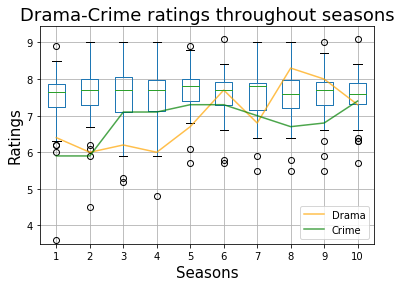

In [369]:
colors=['orange', 'green']
createBoxPlot("Drama", "Crime", colors)

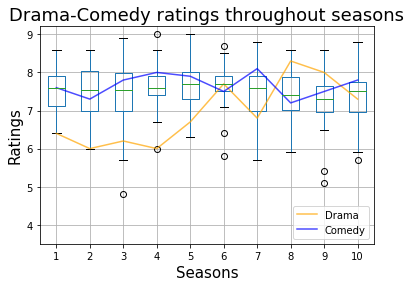

In [370]:
colors=['orange', 'blue']
createBoxPlot("Drama", "Comedy", colors)

## Conclusion
- Drama has higher ratings when paired with other genres
- Crime has higher ratings when paired with other genres
- Comedy has higher ratings on its own

## How does the country affect ratings for different genres ? 
- We'll compare Uk to US as the two are the most common countries in the dataset

In [371]:
comedydf_ten=comedydf[comedydf['total_seasons']==10]

In [372]:
comedydict = {}
for i in countrylist:
    count=0
    for j, value in comedydf_ten.iterrows():
        if(comedydf_ten[i][j] == "true"):
            count=count+1
    comedydict[i] = count        
    #print(i + str(count))

In [373]:
sorted(comedydict.items(), key=lambda x: x[1])

[('Mexico', 0),
 ('Yugoslavia', 0),
 ('Netherlands', 0),
 ('Sweden', 0),
 ('Belgium', 0),
 ('Austria', 0),
 ('Switzerland', 0),
 ('Hungary', 0),
 ('Norway', 0),
 ('New Zealand', 0),
 ('Cuba', 0),
 ('Poland', 0),
 ('Bulgaria', 0),
 ('Portugal', 0),
 ('Brazil', 0),
 ('Russia', 0),
 ('Czechoslovakia', 0),
 ('C N/A', 0),
 ('Hong Kong', 0),
 ('Serbia', 0),
 ('Vietnam', 0),
 ('Greece', 0),
 ('Argentina', 0),
 ('Iceland', 0),
 ('Serbia and Montenegro', 0),
 ('Turkey', 0),
 ('Ireland', 0),
 ('India', 0),
 ('South Africa', 0),
 ('Luxembourg', 0),
 ('Estonia', 0),
 ('Israel', 0),
 ('Romania', 0),
 ('Malaysia', 0),
 ('Czech Republic', 0),
 ('Colombia', 0),
 ('Montenegro', 0),
 ('Chile', 0),
 ('Thailand', 0),
 ('Pakistan', 0),
 ('Georgia', 0),
 ('Cyprus', 0),
 ('United Arab Emirates', 0),
 ('Bangladesh', 0),
 ('Iran', 0),
 ('Ukraine', 0),
 ('Kuwait', 0),
 ('Australia', 1),
 ('Denmark', 1),
 ('Italy', 1),
 ('France', 1),
 ('Japan', 1),
 ('Taiwan', 1),
 ('Philippines', 1),
 ('South Korea', 1),
 ('Sp

In [374]:
comedyus = comedydf_ten[comedydf_ten['USA']=="true"]
comedyuk = comedydf_ten[comedydf_ten['UK']=="true"]

In [375]:
def getcountrymeans(df):
    df=df[df['total_seasons']==10]
    genremeans = []
    genremeans=(round(df['Season 1'].mean(),1), round(df['Season 2'].mean(),1), round(df['Season 3'].mean(),1), round(df['Season 4'].mean(),1), round(df['Season 5'].mean(),1), round(df['Season 6'].mean(),1), round(df['Season 7'].mean(),1), round(df['Season 8'].mean(),1), round(df['Season 9'].mean(),1), round(df['Season 10'].mean(),1) )
    
    return genremeans

In [376]:

comusmean = list(getdfmeans(comedyus, 10))
comukmean = list(getdfmeans(comedyuk,10))



In [377]:
def graphCountry(usmean, ukmean, name):
    seasons=['Season 1', 'Season 2', 'Season 3', 'Season 4', 'Season 5', 'Season 6', 'Season 7', 'Season 8', 'Season 9', 'Season 10']
    time=range(1,11,1)
    compare=pd.DataFrame({'US': usmean, 'UK':ukmean}, index=seasons)
    ax=compare.plot.bar(rot=0)

#ax.figure(figsize=(20,15))
    ax.set_ylabel('Avg. Ratings', fontsize=15)
    ax.set_xlabel('Seasons', fontsize=15)
    ax.set_title('Ratings for ' + name + ' in different countries', fontsize=20)
    ax.set_xticklabels(time)#, labelsize=15)
#ax.set_ytick(fontsize=15)
    ax.tick_params(labelsize=10)
    ax.legend(bbox_to_anchor=(0.97, 1.0))
    plt.show()
    
    plt.savefig("barchart2")

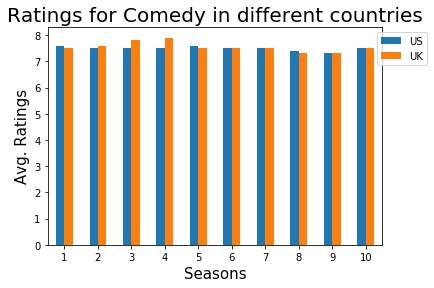

<Figure size 432x288 with 0 Axes>

In [378]:
graphCountry(comusmean, comukmean, "Comedy")

### Drama

In [379]:
dramadf_ten=dramadf[dramadf['total_seasons']==10]

In [380]:
dramadict = {}
for i in countrylist:
    count=0
    for j, value in dramadf_ten.iterrows():
        if(dramadf_ten[i][j] == "true"):
            count=count+1
    dramadict[i] = count        
    #print(i + str(count))

In [381]:
dramadict

{'USA': 14,
 'Canada': 2,
 'UK': 8,
 'Australia': 0,
 'Mexico': 0,
 'Yugoslavia': 0,
 'Denmark': 0,
 'Netherlands': 0,
 'Italy': 0,
 'Sweden': 1,
 'France': 0,
 'Germany': 1,
 'Belgium': 2,
 'Japan': 0,
 'Austria': 0,
 'Switzerland': 0,
 'Hungary': 0,
 'Norway': 0,
 'Taiwan': 0,
 'Philippines': 0,
 'South Korea': 0,
 'New Zealand': 0,
 'Spain': 0,
 'China': 0,
 'Cuba': 0,
 'Poland': 0,
 'Bulgaria': 0,
 'Portugal': 0,
 'Finland': 0,
 'Brazil': 0,
 'Russia': 0,
 'Czechoslovakia': 0,
 'C N/A': 0,
 'Hong Kong': 0,
 'Serbia': 0,
 'Vietnam': 0,
 'Greece': 0,
 'Argentina': 0,
 'Iceland': 0,
 'Serbia and Montenegro': 0,
 'Turkey': 0,
 'Ireland': 0,
 'Croatia': 0,
 'India': 0,
 'South Africa': 0,
 'Luxembourg': 0,
 'Singapore': 0,
 'Estonia': 0,
 'Israel': 0,
 'Romania': 0,
 'Bosnia and Herzegovina': 0,
 'Malaysia': 0,
 'Czech Republic': 0,
 'Colombia': 0,
 'Montenegro': 0,
 'Chile': 0,
 'Thailand': 0,
 'Pakistan': 0,
 'Georgia': 0,
 'Cyprus': 0,
 'United Arab Emirates': 0,
 'Bangladesh': 0,
 '

In [382]:
dramaus = dramadf_ten[dramadf_ten['USA']=="true"]
dramauk = dramadf_ten[dramadf_ten['UK']=="true"]


In [383]:
dramusmean = list(getdfmeans(dramaus,10))
dramukmean = list(getdfmeans(dramauk,10))


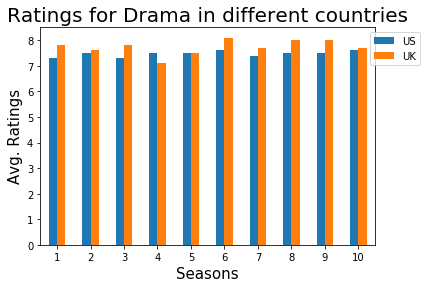

<Figure size 432x288 with 0 Axes>

In [384]:
graphCountry(dramusmean, dramukmean, "Drama")

From this analysis, I can conclude that drama and comedy shows made in the UK tend to fluctuate a lot while the rating of shows made in US are consistent in the ratings across the seasons.